In [ ]:
import numpy as np
import gym
import random
from collections import deque
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

Using TensorFlow backend.


**DQN Agent**

In [ ]:
class DQNAgent:
    def __init__(self, env):
      self.env = env
      self.observation_space = env.observation_space
      self.action_space = env.action_space
      self.size_of_state = self.observation_space.shape[0]
      self.number_of_actions = self.action_space.n
      
      self.memory = deque(maxlen=50000)
      self.gamma = 0.9
      self.epsilon_max = 1.0
      self.epsilon_min = 0.001
      self.epsilon_decay = 0.9
      self.batch_size = 32
      self.epsilon = self.epsilon_max
      self.epsilon_history = [self.epsilon]
      self.reward_history = []
      self.average_reward_history = []

      self.model = self.build_model()
      self.target_model = self.build_model()
      self.sync_target()

    def build_model(self):
      model = Sequential()
      model.add(Dense(24, input_dim=self.size_of_state, activation='relu'))
      model.add(Dense(24, activation='relu'))
      model.add(Dense(24, activation='relu'))
      model.add(Dense(self.number_of_actions, activation='linear'))
      model.compile(loss='mse', optimizer=Adam(lr=0.001))
      return model

    def step(self, state):
      if self.epsilon > np.random.rand():
        action = np.random.choice(self.number_of_actions)
      else:
        action = np.argmax(self.model.predict(state)[0])
      return action
      
    def sync_target(self):
      self.target_model.set_weights(self.model.get_weights())

    def replay(self):
      if len(self.memory) < self.batch_size:
        return      
      sample_batch = random.sample(self.memory, self.batch_size)
      
      for state, action, reward, state_prime, done in sample_batch:
          state_target = self.target_model.predict(state)
          if done:
            state_target[0][action] = reward
          else:
            Q_prime = max(self.target_model.predict(state_prime)[0])
            state_target[0][action] = reward + self.gamma*Q_prime
          self.model.fit(state, state_target, epochs = 1, verbose = 0)

    def update_epsilon(self):
      #Update epsilon
      self.epsilon*= self.epsilon_decay
      self.epsilon = max(self.epsilon,self.epsilon_min)
      self.epsilon_history.append(self.epsilon)

        

**CartPole using DQN Agent**

In [ ]:
class Environment:
    def __init__(self):
      self.env = gym.make('CartPole-v1') #rendering wrap_env(gym.make('CartPole-v1'))
      self.dqnAgent = DQNAgent(self.env)
      self.observation_space = self.env.observation_space
      self.action_space = self.env.action_space
      self.size_of_state = self.observation_space.shape[0]
      self.number_of_actions = self.action_space.n
      self.number_of_episodes = 500
      self.C = 1 
      self.reward_average_episodes = 10
      

    def train(self):
      for episode in range(self.number_of_episodes):
        state = self.env.reset()
        state = state.reshape(1,self.size_of_state)
        done = False
        episode_reward = 0
        while not done:
            action = self.dqnAgent.step(state)
            state_prime, reward, done, info = self.env.step(action)
            #self.env.render()
            episode_reward+=reward
            state_prime = state_prime.reshape(1,self.size_of_state)
            self.dqnAgent.memory.append([state, action, reward, state_prime, done])
            state = state_prime
        self.dqnAgent.replay()
        self.dqnAgent.update_epsilon()
        self.dqnAgent.reward_history.append(episode_reward)
        print("Episode: {}, episode_reward: {}".format(episode, episode_reward))
        #show_video()
        if episode > self.reward_average_episodes:
          self.dqnAgent.average_reward_history.append(sum(self.dqnAgent.reward_history[-self.reward_average_episodes:])/self.reward_average_episodes)

        if episode % self.C == 0:
          self.dqnAgent.sync_target()

In [8]:
env = Environment()
env.train()

Episode: 0, episode_reward: 15.0


Episode: 1, episode_reward: 18.0


Episode: 2, episode_reward: 9.0


Episode: 3, episode_reward: 11.0


Episode: 4, episode_reward: 10.0


Episode: 5, episode_reward: 9.0


Episode: 6, episode_reward: 13.0


Episode: 7, episode_reward: 11.0


Episode: 8, episode_reward: 10.0


Episode: 9, episode_reward: 9.0


Episode: 10, episode_reward: 11.0


Episode: 11, episode_reward: 10.0


Episode: 12, episode_reward: 10.0


Episode: 13, episode_reward: 9.0


Episode: 14, episode_reward: 13.0


Episode: 15, episode_reward: 12.0


Episode: 16, episode_reward: 10.0


Episode: 17, episode_reward: 9.0


Episode: 18, episode_reward: 9.0


Episode: 19, episode_reward: 8.0


Episode: 20, episode_reward: 10.0


Episode: 21, episode_reward: 8.0


Episode: 22, episode_reward: 9.0


Episode: 23, episode_reward: 9.0


Episode: 24, episode_reward: 10.0


Episode: 25, episode_reward: 8.0


Episode: 26, episode_reward: 10.0


Episode: 27, episode_reward: 9.0


Episode: 28, episode_reward: 10.0


Episode: 29, episode_reward: 10.0


Episode: 30, episode_reward: 10.0


Episode: 31, episode_reward: 9.0


Episode: 32, episode_reward: 10.0


Episode: 33, episode_reward: 9.0


Episode: 34, episode_reward: 9.0


Episode: 35, episode_reward: 9.0


Episode: 36, episode_reward: 10.0


Episode: 37, episode_reward: 9.0


Episode: 38, episode_reward: 10.0


Episode: 39, episode_reward: 9.0


Episode: 40, episode_reward: 9.0


Episode: 41, episode_reward: 10.0


Episode: 42, episode_reward: 10.0


Episode: 43, episode_reward: 11.0


Episode: 44, episode_reward: 12.0


Episode: 45, episode_reward: 11.0


Episode: 46, episode_reward: 11.0


Episode: 47, episode_reward: 15.0


Episode: 48, episode_reward: 17.0


Episode: 49, episode_reward: 15.0


Episode: 50, episode_reward: 10.0


Episode: 51, episode_reward: 18.0


Episode: 52, episode_reward: 11.0


Episode: 53, episode_reward: 10.0


Episode: 54, episode_reward: 9.0


Episode: 55, episode_reward: 15.0


Episode: 56, episode_reward: 11.0


Episode: 57, episode_reward: 10.0


Episode: 58, episode_reward: 14.0


Episode: 59, episode_reward: 13.0


Episode: 60, episode_reward: 31.0


Episode: 61, episode_reward: 11.0


Episode: 62, episode_reward: 14.0


Episode: 63, episode_reward: 15.0


Episode: 64, episode_reward: 16.0


Episode: 65, episode_reward: 25.0


Episode: 66, episode_reward: 161.0


Episode: 67, episode_reward: 47.0


Episode: 68, episode_reward: 45.0


Episode: 69, episode_reward: 10.0


Episode: 70, episode_reward: 13.0


Episode: 71, episode_reward: 75.0


Episode: 72, episode_reward: 80.0


Episode: 73, episode_reward: 500.0


Episode: 74, episode_reward: 43.0


Episode: 75, episode_reward: 13.0


Episode: 76, episode_reward: 12.0


Episode: 77, episode_reward: 17.0


Episode: 78, episode_reward: 134.0


Episode: 79, episode_reward: 150.0


Episode: 80, episode_reward: 219.0


Episode: 81, episode_reward: 129.0


Episode: 82, episode_reward: 173.0


Episode: 83, episode_reward: 127.0


Episode: 84, episode_reward: 116.0


Episode: 85, episode_reward: 16.0


Episode: 86, episode_reward: 90.0


Episode: 87, episode_reward: 119.0


Episode: 88, episode_reward: 152.0


Episode: 89, episode_reward: 119.0


Episode: 90, episode_reward: 103.0


Episode: 91, episode_reward: 246.0


Episode: 92, episode_reward: 89.0


Episode: 93, episode_reward: 91.0


Episode: 94, episode_reward: 94.0


Episode: 95, episode_reward: 102.0


Episode: 96, episode_reward: 135.0


Episode: 97, episode_reward: 115.0


Episode: 98, episode_reward: 473.0


Episode: 99, episode_reward: 22.0


Episode: 100, episode_reward: 17.0


Episode: 101, episode_reward: 17.0


Episode: 102, episode_reward: 11.0


Episode: 103, episode_reward: 27.0


Episode: 104, episode_reward: 103.0


Episode: 105, episode_reward: 107.0


Episode: 106, episode_reward: 150.0


Episode: 107, episode_reward: 107.0


Episode: 108, episode_reward: 23.0


Episode: 109, episode_reward: 25.0


Episode: 110, episode_reward: 87.0


Episode: 111, episode_reward: 91.0


Episode: 112, episode_reward: 19.0


Episode: 113, episode_reward: 188.0


Episode: 114, episode_reward: 219.0


Episode: 115, episode_reward: 44.0


Episode: 116, episode_reward: 21.0


Episode: 117, episode_reward: 24.0


Episode: 118, episode_reward: 103.0


Episode: 119, episode_reward: 183.0


Episode: 120, episode_reward: 43.0


Episode: 121, episode_reward: 29.0


Episode: 122, episode_reward: 27.0


Episode: 123, episode_reward: 45.0


Episode: 124, episode_reward: 39.0


Episode: 125, episode_reward: 26.0


Episode: 126, episode_reward: 162.0


Episode: 127, episode_reward: 177.0


Episode: 128, episode_reward: 148.0


Episode: 129, episode_reward: 24.0


Episode: 130, episode_reward: 33.0


Episode: 131, episode_reward: 23.0


Episode: 132, episode_reward: 27.0


Episode: 133, episode_reward: 31.0


Episode: 134, episode_reward: 31.0


Episode: 135, episode_reward: 14.0


Episode: 136, episode_reward: 22.0


Episode: 137, episode_reward: 34.0


Episode: 138, episode_reward: 51.0


Episode: 139, episode_reward: 133.0


Episode: 140, episode_reward: 42.0


Episode: 141, episode_reward: 85.0


Episode: 142, episode_reward: 23.0


Episode: 143, episode_reward: 132.0


Episode: 144, episode_reward: 116.0


Episode: 145, episode_reward: 110.0


Episode: 146, episode_reward: 110.0


Episode: 147, episode_reward: 106.0


Episode: 148, episode_reward: 213.0


Episode: 149, episode_reward: 107.0


Episode: 150, episode_reward: 21.0


Episode: 151, episode_reward: 112.0


Episode: 152, episode_reward: 103.0


Episode: 153, episode_reward: 119.0


Episode: 154, episode_reward: 25.0


Episode: 155, episode_reward: 117.0


Episode: 156, episode_reward: 53.0


Episode: 157, episode_reward: 101.0


Episode: 158, episode_reward: 21.0


Episode: 159, episode_reward: 99.0


Episode: 160, episode_reward: 40.0


Episode: 161, episode_reward: 22.0


Episode: 162, episode_reward: 21.0


Episode: 163, episode_reward: 29.0


Episode: 164, episode_reward: 24.0


Episode: 165, episode_reward: 15.0


Episode: 166, episode_reward: 14.0


Episode: 167, episode_reward: 12.0


Episode: 168, episode_reward: 18.0


Episode: 169, episode_reward: 27.0


Episode: 170, episode_reward: 23.0


Episode: 171, episode_reward: 42.0


Episode: 172, episode_reward: 39.0


Episode: 173, episode_reward: 25.0


Episode: 174, episode_reward: 45.0


Episode: 175, episode_reward: 67.0


Episode: 176, episode_reward: 66.0


Episode: 177, episode_reward: 28.0


Episode: 178, episode_reward: 58.0


Episode: 179, episode_reward: 87.0


Episode: 180, episode_reward: 43.0


Episode: 181, episode_reward: 99.0


Episode: 182, episode_reward: 38.0


Episode: 183, episode_reward: 72.0


Episode: 184, episode_reward: 37.0


Episode: 185, episode_reward: 26.0


Episode: 186, episode_reward: 129.0


Episode: 187, episode_reward: 28.0


Episode: 188, episode_reward: 27.0


Episode: 189, episode_reward: 19.0


Episode: 190, episode_reward: 84.0


Episode: 191, episode_reward: 147.0


Episode: 192, episode_reward: 26.0


Episode: 193, episode_reward: 88.0


Episode: 194, episode_reward: 161.0


Episode: 195, episode_reward: 131.0


Episode: 196, episode_reward: 125.0


Episode: 197, episode_reward: 125.0


Episode: 198, episode_reward: 151.0


Episode: 199, episode_reward: 90.0


Episode: 200, episode_reward: 63.0


Episode: 201, episode_reward: 36.0


Episode: 202, episode_reward: 185.0


Episode: 203, episode_reward: 115.0


Episode: 204, episode_reward: 105.0


Episode: 205, episode_reward: 54.0


Episode: 206, episode_reward: 85.0


Episode: 207, episode_reward: 99.0


Episode: 208, episode_reward: 21.0


Episode: 209, episode_reward: 29.0


Episode: 210, episode_reward: 35.0


Episode: 211, episode_reward: 96.0


Episode: 212, episode_reward: 30.0


Episode: 213, episode_reward: 123.0


Episode: 214, episode_reward: 153.0


Episode: 215, episode_reward: 45.0


Episode: 216, episode_reward: 97.0


Episode: 217, episode_reward: 500.0


Episode: 218, episode_reward: 281.0


Episode: 219, episode_reward: 500.0


Episode: 220, episode_reward: 500.0


Episode: 221, episode_reward: 151.0


Episode: 222, episode_reward: 18.0


Episode: 223, episode_reward: 32.0


Episode: 224, episode_reward: 87.0


Episode: 225, episode_reward: 500.0


Episode: 226, episode_reward: 500.0


Episode: 227, episode_reward: 500.0


Episode: 228, episode_reward: 500.0


Episode: 229, episode_reward: 500.0


Episode: 230, episode_reward: 500.0


Episode: 231, episode_reward: 500.0


Episode: 232, episode_reward: 25.0


Episode: 233, episode_reward: 19.0


Episode: 234, episode_reward: 29.0


Episode: 235, episode_reward: 500.0


Episode: 236, episode_reward: 215.0


Episode: 237, episode_reward: 15.0


Episode: 238, episode_reward: 18.0


Episode: 239, episode_reward: 18.0


Episode: 240, episode_reward: 19.0


Episode: 241, episode_reward: 123.0


Episode: 242, episode_reward: 162.0


Episode: 243, episode_reward: 15.0


Episode: 244, episode_reward: 104.0


Episode: 245, episode_reward: 15.0


Episode: 246, episode_reward: 23.0


Episode: 247, episode_reward: 126.0


Episode: 248, episode_reward: 269.0


Episode: 249, episode_reward: 446.0


Episode: 250, episode_reward: 212.0


Episode: 251, episode_reward: 194.0


Episode: 252, episode_reward: 199.0


Episode: 253, episode_reward: 110.0


Episode: 254, episode_reward: 277.0


Episode: 255, episode_reward: 208.0


Episode: 256, episode_reward: 219.0


Episode: 257, episode_reward: 114.0


Episode: 258, episode_reward: 17.0


Episode: 259, episode_reward: 9.0


Episode: 260, episode_reward: 10.0


Episode: 261, episode_reward: 15.0


Episode: 262, episode_reward: 88.0


Episode: 263, episode_reward: 107.0


Episode: 264, episode_reward: 127.0


Episode: 265, episode_reward: 115.0


Episode: 266, episode_reward: 127.0


Episode: 267, episode_reward: 141.0


Episode: 268, episode_reward: 131.0


Episode: 269, episode_reward: 131.0


Episode: 270, episode_reward: 159.0


Episode: 271, episode_reward: 169.0


Episode: 272, episode_reward: 245.0


Episode: 273, episode_reward: 138.0


Episode: 274, episode_reward: 110.0


Episode: 275, episode_reward: 27.0


Episode: 276, episode_reward: 14.0


Episode: 277, episode_reward: 21.0


Episode: 278, episode_reward: 291.0


Episode: 279, episode_reward: 147.0


Episode: 280, episode_reward: 150.0


Episode: 281, episode_reward: 174.0


Episode: 282, episode_reward: 127.0


Episode: 283, episode_reward: 92.0


Episode: 284, episode_reward: 150.0


Episode: 285, episode_reward: 99.0


Episode: 286, episode_reward: 110.0


Episode: 287, episode_reward: 20.0


Episode: 288, episode_reward: 100.0


Episode: 289, episode_reward: 139.0


Episode: 290, episode_reward: 129.0


Episode: 291, episode_reward: 115.0


Episode: 292, episode_reward: 155.0


Episode: 293, episode_reward: 97.0


Episode: 294, episode_reward: 84.0


Episode: 295, episode_reward: 89.0


Episode: 296, episode_reward: 30.0


Episode: 297, episode_reward: 27.0


Episode: 298, episode_reward: 70.0


Episode: 299, episode_reward: 87.0


Episode: 300, episode_reward: 84.0


Episode: 301, episode_reward: 88.0


Episode: 302, episode_reward: 118.0


Episode: 303, episode_reward: 116.0


Episode: 304, episode_reward: 126.0


Episode: 305, episode_reward: 111.0


Episode: 306, episode_reward: 126.0


Episode: 307, episode_reward: 353.0


Episode: 308, episode_reward: 191.0


Episode: 309, episode_reward: 275.0


Episode: 310, episode_reward: 475.0


Episode: 311, episode_reward: 418.0


Episode: 312, episode_reward: 288.0


Episode: 313, episode_reward: 118.0


Episode: 314, episode_reward: 210.0


Episode: 315, episode_reward: 106.0


Episode: 316, episode_reward: 166.0


Episode: 317, episode_reward: 500.0


Episode: 318, episode_reward: 196.0


Episode: 319, episode_reward: 125.0


Episode: 320, episode_reward: 147.0


Episode: 321, episode_reward: 101.0


Episode: 322, episode_reward: 115.0


Episode: 323, episode_reward: 135.0


Episode: 324, episode_reward: 143.0


Episode: 325, episode_reward: 177.0


Episode: 326, episode_reward: 152.0


Episode: 327, episode_reward: 152.0


Episode: 328, episode_reward: 154.0


Episode: 329, episode_reward: 116.0


Episode: 330, episode_reward: 174.0


Episode: 331, episode_reward: 451.0


Episode: 332, episode_reward: 361.0


Episode: 333, episode_reward: 122.0


Episode: 334, episode_reward: 106.0


Episode: 335, episode_reward: 180.0


Episode: 336, episode_reward: 432.0


Episode: 337, episode_reward: 152.0


Episode: 338, episode_reward: 363.0


Episode: 339, episode_reward: 247.0


Episode: 340, episode_reward: 291.0


Episode: 341, episode_reward: 500.0


Episode: 342, episode_reward: 500.0


Episode: 343, episode_reward: 460.0


Episode: 344, episode_reward: 386.0


Episode: 345, episode_reward: 476.0


Episode: 346, episode_reward: 290.0


Episode: 347, episode_reward: 90.0


Episode: 348, episode_reward: 101.0


Episode: 349, episode_reward: 148.0


Episode: 350, episode_reward: 178.0


Episode: 351, episode_reward: 257.0


Episode: 352, episode_reward: 296.0


Episode: 353, episode_reward: 237.0


Episode: 354, episode_reward: 222.0


Episode: 355, episode_reward: 379.0


Episode: 356, episode_reward: 500.0


Episode: 357, episode_reward: 162.0


Episode: 358, episode_reward: 500.0


Episode: 359, episode_reward: 500.0


Episode: 360, episode_reward: 161.0


Episode: 361, episode_reward: 136.0


Episode: 362, episode_reward: 288.0


Episode: 363, episode_reward: 142.0


Episode: 364, episode_reward: 168.0


Episode: 365, episode_reward: 136.0


Episode: 366, episode_reward: 171.0


Episode: 367, episode_reward: 116.0


Episode: 368, episode_reward: 157.0


Episode: 369, episode_reward: 272.0


Episode: 370, episode_reward: 150.0


Episode: 371, episode_reward: 136.0


Episode: 372, episode_reward: 79.0


Episode: 373, episode_reward: 27.0


Episode: 374, episode_reward: 66.0


Episode: 375, episode_reward: 81.0


Episode: 376, episode_reward: 82.0


Episode: 377, episode_reward: 114.0


Episode: 378, episode_reward: 107.0


Episode: 379, episode_reward: 193.0


Episode: 381, episode_reward: 220.0


Episode: 382, episode_reward: 258.0


Episode: 383, episode_reward: 279.0


Episode: 384, episode_reward: 349.0


Episode: 385, episode_reward: 92.0


Episode: 386, episode_reward: 248.0


Episode: 387, episode_reward: 162.0


Episode: 388, episode_reward: 115.0


Episode: 389, episode_reward: 176.0


Episode: 390, episode_reward: 139.0


Episode: 391, episode_reward: 250.0


Episode: 392, episode_reward: 134.0


Episode: 393, episode_reward: 208.0


Episode: 394, episode_reward: 152.0


Episode: 395, episode_reward: 324.0


Episode: 396, episode_reward: 330.0


Episode: 397, episode_reward: 180.0


Episode: 398, episode_reward: 287.0


Episode: 399, episode_reward: 139.0


Episode: 400, episode_reward: 500.0


Episode: 401, episode_reward: 136.0


Episode: 402, episode_reward: 357.0


Episode: 403, episode_reward: 500.0


Episode: 404, episode_reward: 439.0


Episode: 405, episode_reward: 223.0


Episode: 406, episode_reward: 165.0


Episode: 407, episode_reward: 201.0


Episode: 408, episode_reward: 272.0


Episode: 409, episode_reward: 500.0


Episode: 410, episode_reward: 177.0


Episode: 411, episode_reward: 83.0


Episode: 412, episode_reward: 115.0


Episode: 413, episode_reward: 159.0


Episode: 414, episode_reward: 213.0


Episode: 415, episode_reward: 356.0


Episode: 416, episode_reward: 397.0


Episode: 417, episode_reward: 213.0


Episode: 418, episode_reward: 340.0


Episode: 419, episode_reward: 263.0


Episode: 420, episode_reward: 468.0


Episode: 421, episode_reward: 345.0


Episode: 422, episode_reward: 109.0


Episode: 423, episode_reward: 260.0


Episode: 424, episode_reward: 141.0


Episode: 425, episode_reward: 159.0


Episode: 426, episode_reward: 148.0


Episode: 427, episode_reward: 233.0


Episode: 428, episode_reward: 165.0


Episode: 429, episode_reward: 163.0


Episode: 430, episode_reward: 109.0


Episode: 431, episode_reward: 196.0


Episode: 432, episode_reward: 270.0


Episode: 433, episode_reward: 450.0


Episode: 434, episode_reward: 324.0


Episode: 435, episode_reward: 226.0


Episode: 436, episode_reward: 92.0


Episode: 437, episode_reward: 204.0


Episode: 438, episode_reward: 182.0


Episode: 439, episode_reward: 286.0


Episode: 440, episode_reward: 240.0


Episode: 441, episode_reward: 205.0


Episode: 442, episode_reward: 105.0


Episode: 443, episode_reward: 328.0


Episode: 444, episode_reward: 182.0


Episode: 445, episode_reward: 157.0


Episode: 446, episode_reward: 411.0


Episode: 447, episode_reward: 102.0


Episode: 448, episode_reward: 500.0


Episode: 449, episode_reward: 500.0


Episode: 450, episode_reward: 220.0


Episode: 451, episode_reward: 500.0


Episode: 452, episode_reward: 498.0


Episode: 453, episode_reward: 207.0


Episode: 454, episode_reward: 375.0


Episode: 455, episode_reward: 259.0


Episode: 456, episode_reward: 425.0


Episode: 457, episode_reward: 259.0


Episode: 458, episode_reward: 500.0


Episode: 459, episode_reward: 500.0


Episode: 460, episode_reward: 300.0


Episode: 461, episode_reward: 500.0


Episode: 462, episode_reward: 407.0


Episode: 463, episode_reward: 181.0


Episode: 464, episode_reward: 346.0


Episode: 465, episode_reward: 361.0


Episode: 466, episode_reward: 191.0


Episode: 467, episode_reward: 219.0


Episode: 468, episode_reward: 168.0


Episode: 469, episode_reward: 494.0


Episode: 470, episode_reward: 184.0


Episode: 471, episode_reward: 307.0


Episode: 472, episode_reward: 500.0


Episode: 473, episode_reward: 182.0


Episode: 474, episode_reward: 500.0


Episode: 475, episode_reward: 174.0


Episode: 476, episode_reward: 329.0


Episode: 477, episode_reward: 403.0


Episode: 478, episode_reward: 238.0


Episode: 479, episode_reward: 475.0


Episode: 480, episode_reward: 269.0


Episode: 481, episode_reward: 256.0


Episode: 482, episode_reward: 150.0


Episode: 483, episode_reward: 208.0


Episode: 484, episode_reward: 191.0


Episode: 485, episode_reward: 190.0


Episode: 486, episode_reward: 402.0


Episode: 487, episode_reward: 182.0


Episode: 488, episode_reward: 302.0


Episode: 489, episode_reward: 260.0


Episode: 490, episode_reward: 221.0


Episode: 491, episode_reward: 215.0


Episode: 492, episode_reward: 261.0


Episode: 493, episode_reward: 401.0


Episode: 494, episode_reward: 221.0


Episode: 495, episode_reward: 301.0


Episode: 496, episode_reward: 300.0


Episode: 497, episode_reward: 199.0


Episode: 498, episode_reward: 84.0


Episode: 499, episode_reward: 261.0


**Double DQN(DDQN) Agent**

In [ ]:
class DDQNAgent:
    def __init__(self, env):
      self.env = env
      self.observation_space = env.observation_space
      self.action_space = env.action_space
      self.size_of_state = self.observation_space.shape[0]
      self.number_of_actions = self.action_space.n
      
      self.memory = deque(maxlen=50000)
      self.gamma = 0.9
      self.epsilon_max = 1.0
      self.epsilon_min = 0.001
      self.epsilon_decay = 0.9 
      self.batch_size = 32
      self.tau = 0.99
      self.epsilon = self.epsilon_max
      self.epsilon_history = [self.epsilon]
      self.reward_history = []
      self.average_reward_history = []
      self.model = self.build_model()
      self.target_model = self.build_model()
      self.sync_target()


    def build_model(self):
      model = Sequential()
      model.add(Dense(24, input_dim=self.size_of_state, activation='relu'))
      model.add(Dense(24, activation='relu'))
      model.add(Dense(24, activation='relu'))
      model.add(Dense(self.number_of_actions, activation='linear'))
      model.compile(loss='mse', optimizer=Adam(lr=0.001))
      return model

    def step(self, state):
      if self.epsilon > np.random.rand():
        action = np.random.choice(self.number_of_actions)
      else:
        action = np.argmax(self.model.predict(state)[0]) 
      return action
      
    def sync_target(self):
      model_weights = self.model.get_weights()
      target_weights = self.target_model.get_weights()
      for i, (model_weight, target_weight) in enumerate(zip(model_weights, target_weights)):
        target_weights[i] =  model_weight*self.tau + target_weight * (1-self.tau) 
      self.target_model.set_weights(target_weights)

    def replay(self):
      if len(self.memory) < self.batch_size:
        return
      sample_batch = random.sample(self.memory, self.batch_size)
      
      for state, action, reward, state_prime, done in sample_batch:
        state_target = self.model.predict(state)
        if done:
          state_target[0][action] = reward
        else:
          best_action = np.argmax(self.model.predict(state_prime)[0])
          Q_prime = self.target_model.predict(state_prime)[0][best_action]
          state_target[0][action] = reward + self.gamma*Q_prime
        self.model.fit(state, state_target, epochs = 1, verbose = 0)

    def update_epsilon(self):
      self.epsilon*= self.epsilon_decay
      self.epsilon = max(self.epsilon,self.epsilon_min)
      self.epsilon_history.append(self.epsilon)



**CartPole using DDQN Agent**

In [ ]:
class dEnvironment:
    def __init__(self):
      self.env = gym.make('CartPole-v1') #rendering wrap_env(gym.make('CartPole-v1'))
      self.dqnAgent = DDQNAgent(self.env)
      self.observation_space = self.env.observation_space
      self.action_space = self.env.action_space
      self.size_of_state = self.observation_space.shape[0]
      self.number_of_actions = self.action_space.n
      self.number_of_episodes = 500
      self.C = 1 
      self.reward_average_episodes = 10
      

    def train(self):
      for episode in range(self.number_of_episodes):
        state = self.env.reset()
        state = state.reshape(1,self.size_of_state)
        done = False
        episode_reward = 0
        while not done:
            action = self.dqnAgent.step(state)
            state_prime, reward, done, info = self.env.step(action)
            #self.env.render()
            episode_reward+=reward
            state_prime = state_prime.reshape(1,self.size_of_state)
            self.dqnAgent.memory.append([state, action, reward, state_prime, done])
            state = state_prime
        self.dqnAgent.replay()
        self.dqnAgent.update_epsilon()
        self.dqnAgent.reward_history.append(episode_reward)
        print("Episode: {}, episode_reward: {}".format(episode, episode_reward))
        #show_video()
        if episode > self.reward_average_episodes:
          self.dqnAgent.average_reward_history.append(sum(self.dqnAgent.reward_history[-self.reward_average_episodes:])/self.reward_average_episodes)

        if episode % self.C == 0:
          self.dqnAgent.sync_target()


In [ ]:
denv = dEnvironment()
denv.train()

Episode: 0, episode_reward: 15.0
Episode: 1, episode_reward: 39.0
Episode: 2, episode_reward: 13.0
Episode: 3, episode_reward: 14.0
Episode: 4, episode_reward: 42.0
Episode: 5, episode_reward: 18.0
Episode: 6, episode_reward: 10.0
Episode: 7, episode_reward: 14.0
Episode: 8, episode_reward: 9.0
Episode: 9, episode_reward: 11.0
Episode: 10, episode_reward: 10.0
Episode: 11, episode_reward: 11.0
Episode: 12, episode_reward: 10.0
Episode: 13, episode_reward: 9.0
Episode: 14, episode_reward: 10.0
Episode: 15, episode_reward: 8.0
Episode: 16, episode_reward: 9.0
Episode: 17, episode_reward: 9.0
Episode: 18, episode_reward: 10.0
Episode: 19, episode_reward: 10.0
Episode: 20, episode_reward: 8.0
Episode: 21, episode_reward: 10.0
Episode: 22, episode_reward: 9.0
Episode: 23, episode_reward: 10.0
Episode: 24, episode_reward: 9.0
Episode: 25, episode_reward: 11.0
Episode: 26, episode_reward: 10.0
Episode: 27, episode_reward: 10.0
Episode: 28, episode_reward: 8.0
Episode: 29, episode_reward: 9.0


**Epsilon decay graphs**

DQN 

Epsilon for DQN:  [1.0, 0.9, 0.81, 0.7290000000000001, 0.6561000000000001, 0.5904900000000002, 0.5314410000000002, 0.47829690000000014, 0.43046721000000016, 0.38742048900000015, 0.34867844010000015, 0.31381059609000017, 0.28242953648100017, 0.25418658283290013, 0.22876792454961012, 0.2058911320946491, 0.1853020188851842, 0.16677181699666577, 0.1500946352969992, 0.13508517176729928, 0.12157665459056936, 0.10941898913151243, 0.0984770902183612, 0.08862938119652508, 0.07976644307687257, 0.07178979876918531, 0.06461081889226679, 0.05814973700304011, 0.0523347633027361, 0.04710128697246249, 0.042391158275216244, 0.03815204244769462, 0.03433683820292516, 0.030903154382632643, 0.02781283894436938, 0.025031555049932444, 0.0225283995449392, 0.020275559590445278, 0.01824800363140075, 0.016423203268260675, 0.014780882941434608, 0.013302794647291147, 0.011972515182562033, 0.01077526366430583, 0.009697737297875247, 0.008727963568087723, 0.00785516721127895, 0.007069650490151055, 0.00636268544113595

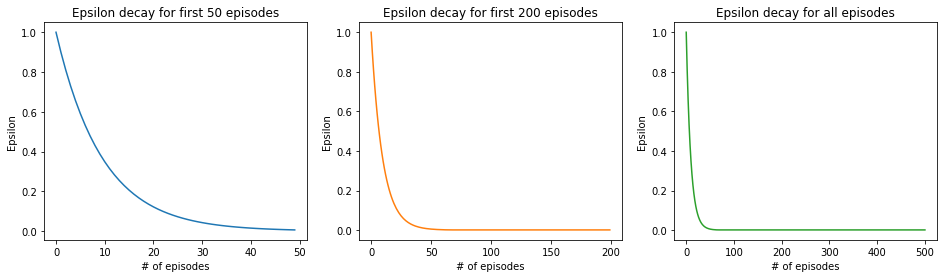

In [ ]:
print("Epsilon for DQN: ", env.dqnAgent.epsilon_history)
history = env.dqnAgent.epsilon_history
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
axs[0].plot(np.arange(len(history[:50])), history[:50])
axs[0].set_title('Epsilon decay for first 50 episodes')
axs[1].plot(np.arange(len(history[:200])), history[:200], 'tab:orange')
axs[1].set_title('Epsilon decay for first 200 episodes')
axs[2].plot(np.arange(len(history)), history, 'tab:green')
axs[2].set_title('Epsilon decay for all episodes')
for ax in axs:
  ax.set(xlabel = "# of episodes")
  ax.set(ylabel = "Epsilon")

DDQN

Epsilon for DDQN:  [1.0, 0.9, 0.81, 0.7290000000000001, 0.6561000000000001, 0.5904900000000002, 0.5314410000000002, 0.47829690000000014, 0.43046721000000016, 0.38742048900000015, 0.34867844010000015, 0.31381059609000017, 0.28242953648100017, 0.25418658283290013, 0.22876792454961012, 0.2058911320946491, 0.1853020188851842, 0.16677181699666577, 0.1500946352969992, 0.13508517176729928, 0.12157665459056936, 0.10941898913151243, 0.0984770902183612, 0.08862938119652508, 0.07976644307687257, 0.07178979876918531, 0.06461081889226679, 0.05814973700304011, 0.0523347633027361, 0.04710128697246249, 0.042391158275216244, 0.03815204244769462, 0.03433683820292516, 0.030903154382632643, 0.02781283894436938, 0.025031555049932444, 0.0225283995449392, 0.020275559590445278, 0.01824800363140075, 0.016423203268260675, 0.014780882941434608, 0.013302794647291147, 0.011972515182562033, 0.01077526366430583, 0.009697737297875247, 0.008727963568087723, 0.00785516721127895, 0.007069650490151055, 0.0063626854411359

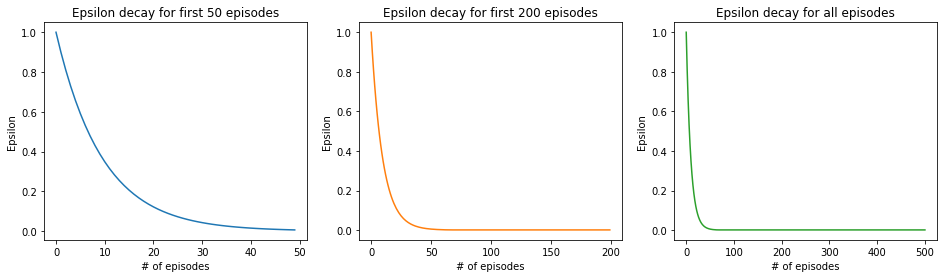

In [ ]:
print("Epsilon for DDQN: ", denv.dqnAgent.epsilon_history)
history = denv.dqnAgent.epsilon_history
fig, axs = plt.subplots(1, 3, figsize=(16, 4))
axs[0].plot(np.arange(len(history[:50])), history[:50])
axs[0].set_title('Epsilon decay for first 50 episodes')
axs[1].plot(np.arange(len(history[:200])), history[:200], 'tab:orange')
axs[1].set_title('Epsilon decay for first 200 episodes')
axs[2].plot(np.arange(len(history)), history, 'tab:green')
axs[2].set_title('Epsilon decay for all episodes')
for ax in axs:
  ax.set(xlabel = "# of episodes")
  ax.set(ylabel = "Epsilon")

**Game score graphs**

Game score for DQN:  [14.0, 29.0, 16.0, 11.0, 12.0, 13.0, 9.0, 12.0, 12.0, 9.0, 11.0, 12.0, 10.0, 15.0, 10.0, 8.0, 10.0, 11.0, 12.0, 10.0, 9.0, 11.0, 12.0, 10.0, 11.0, 10.0, 9.0, 11.0, 12.0, 10.0, 21.0, 10.0, 10.0, 27.0, 28.0, 9.0, 11.0, 12.0, 112.0, 10.0, 10.0, 9.0, 34.0, 14.0, 18.0, 12.0, 9.0, 11.0, 77.0, 125.0, 123.0, 255.0, 124.0, 158.0, 123.0, 97.0, 95.0, 223.0, 119.0, 17.0, 200.0, 164.0, 105.0, 19.0, 15.0, 26.0, 28.0, 9.0, 10.0, 9.0, 13.0, 9.0, 10.0, 11.0, 11.0, 9.0, 10.0, 16.0, 14.0, 9.0, 9.0, 13.0, 19.0, 37.0, 28.0, 18.0, 12.0, 39.0, 18.0, 18.0, 23.0, 18.0, 46.0, 14.0, 62.0, 113.0, 127.0, 216.0, 129.0, 14.0, 152.0, 18.0, 20.0, 44.0, 43.0, 23.0, 46.0, 18.0, 71.0, 20.0, 14.0, 32.0, 37.0, 21.0, 21.0, 33.0, 27.0, 21.0, 43.0, 16.0, 39.0, 56.0, 28.0, 42.0, 33.0, 31.0, 33.0, 30.0, 52.0, 31.0, 38.0, 62.0, 53.0, 42.0, 14.0, 20.0, 65.0, 338.0, 16.0, 79.0, 54.0, 40.0, 51.0, 59.0, 24.0, 35.0, 64.0, 15.0, 25.0, 19.0, 120.0, 15.0, 18.0, 29.0, 50.0, 77.0, 18.0, 112.0, 22.0, 77.0, 50.0, 235.0,

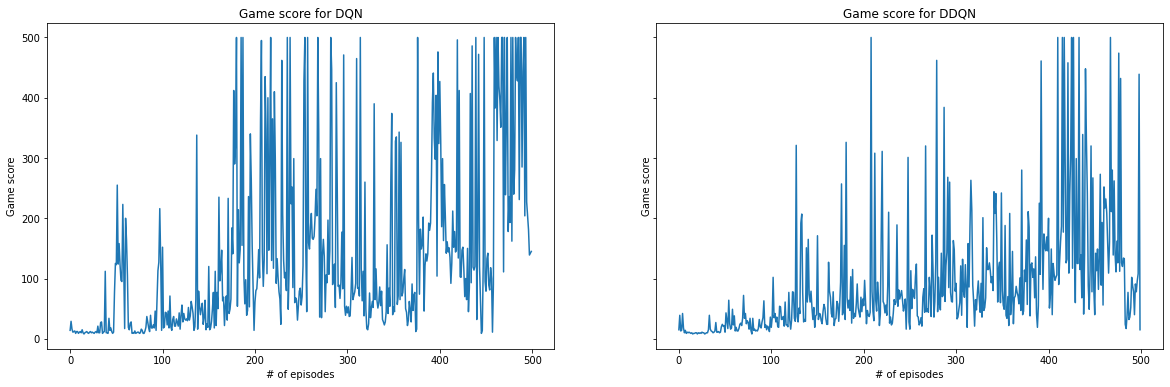

In [ ]:
print("Game score for DQN: ", env.dqnAgent.reward_history)
print("Game score for DDQN: ", denv.dqnAgent.reward_history)
fig, axs = plt.subplots(1, 2, figsize=(20, 6), sharey=True)
axs[0].plot(np.arange(len(env.dqnAgent.reward_history)), env.dqnAgent.reward_history)
axs[0].set_title('Game score for DQN')
axs[1].plot(np.arange(len(denv.dqnAgent.reward_history)), denv.dqnAgent.reward_history)
axs[1].set_title('Game score for DDQN')
for ax in axs:
  ax.set(xlabel = "# of episodes")
  ax.set(ylabel = "Game score")


**Average game score graphs**

Average Game score for DQN:  [11.7, 11.1, 11.5, 11.3, 10.8, 10.9, 10.8, 10.8, 10.9, 10.7, 10.6, 10.8, 10.3, 10.4, 10.6, 10.5, 10.5, 10.5, 10.5, 11.7, 11.6, 11.4, 13.1, 14.8, 14.7, 14.9, 15.0, 25.0, 25.0, 23.9, 23.8, 26.2, 24.9, 23.9, 24.2, 24.0, 23.9, 20.4, 31.9, 43.2, 67.8, 76.8, 91.2, 101.7, 110.2, 118.8, 140.0, 144.2, 133.4, 141.1, 132.0, 130.1, 116.2, 105.4, 98.3, 91.6, 70.2, 59.3, 58.5, 39.8, 24.3, 14.8, 14.0, 13.6, 11.9, 10.1, 10.8, 11.2, 11.2, 10.8, 11.2, 12.1, 14.7, 16.4, 17.3, 17.5, 19.8, 20.2, 21.1, 22.5, 23.0, 25.7, 23.4, 26.8, 36.3, 47.8, 65.5, 76.6, 76.2, 89.1, 89.1, 86.5, 89.5, 87.6, 78.6, 70.5, 50.7, 44.9, 45.5, 31.7, 33.1, 34.8, 32.5, 30.3, 31.3, 29.4, 29.7, 26.9, 26.5, 29.0, 31.4, 30.5, 32.6, 33.8, 33.6, 34.2, 35.1, 36.0, 37.5, 37.4, 38.0, 40.5, 40.5, 38.6, 37.5, 40.7, 71.5, 67.9, 72.7, 74.3, 72.1, 71.9, 73.6, 74.6, 76.1, 76.0, 43.7, 44.6, 38.6, 45.2, 42.7, 39.4, 36.4, 39.0, 43.2, 38.6, 48.3, 48.0, 53.8, 46.8, 68.8, 76.6, 85.2, 94.9, 93.5, 98.6, 89.6, 93.0, 92.4, 90.5,

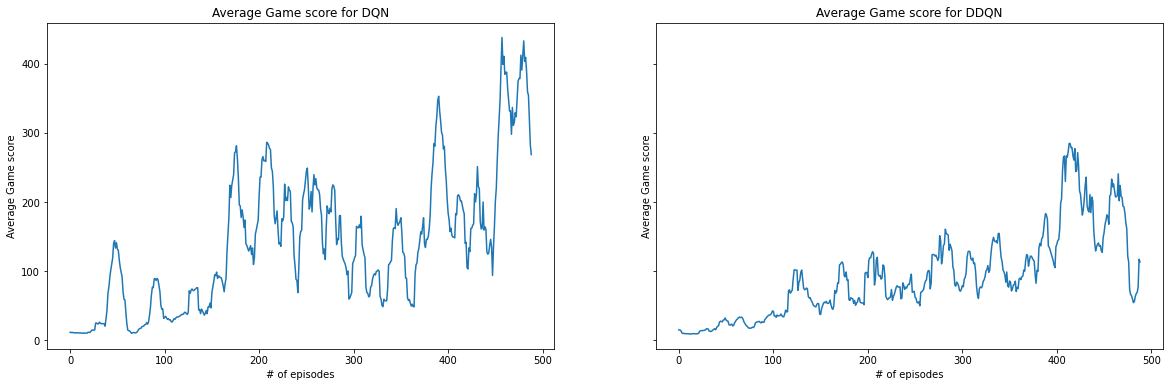

In [ ]:
print("Average Game score for DQN: ", env.dqnAgent.average_reward_history)
print("Average Game score for DDQN: ", denv.dqnAgent.average_reward_history)
fig, axs = plt.subplots(1, 2, figsize=(20, 6),sharey=True)
axs[0].plot(np.arange(len(env.dqnAgent.average_reward_history)), env.dqnAgent.average_reward_history)
axs[0].set_title('Average Game score for DQN')
axs[1].plot(np.arange(len(denv.dqnAgent.average_reward_history)), denv.dqnAgent.average_reward_history)
axs[1].set_title('Average Game score for DDQN')
for ax in axs:
  ax.set(xlabel = "# of episodes")
  ax.set(ylabel = "Average Game score")

In [ ]:
!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1

!pip install gym pyvirtualdisplay 
!apt-get install -y xvfb python-opengl ffmpeg

Requirement already up-to-date: setuptools in /usr/local/lib/python3.6/dist-packages (47.3.1)
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:3.4.6-0ubuntu0.18.04.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
Suggested packages:
  libgle3
The following NEW packages will be installed:
  python-opengl xvfb
0 upgraded, 2 newly installed, 0 to remove and 41 not upgraded.
Need to get 1,280 kB of archives.
After this operation, 7,682 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 python-opengl all 3.1.0+dfsg-1 [496 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.4 [784 kB]
Fetched 1,280 kB in 0s (12.9 MB/s)
Selecting previously unselected package python-opengl.
(Reading database ... 144379 files and direct

In [ ]:
import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only

import math
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

In [ ]:
def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")

def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env